# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and comprises personnel representing the total US Army force including the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of the 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and have many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database includes a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---


#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Imported Libraries*
    
    *ii. Ingested Data *
    
    *iii. Explored Data*
    
    *iv. Outlier Detection*
    
    *v.  Dropped unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separeted the data frame for evaluation purposes

#### 3. Multi-class Classification
- Imported libraries
- Implemented SVM Classifer
- Implemented Decision Tree Classifier
- Implemented Random Forest Classifer
- Implemented XGBoost Classifer
- Compared The Models



# EDA
- Droped unnecessary colums
- Droped DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries

*Note: Other libraries were also imported as needed.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
data = pd.concat([df_male, df_female])
data= data.reset_index()
data

# Copy dataframe for manipulating
data = data.copy()

## Explore Data

In [5]:
data.shape

(6068, 110)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 110 entries, index to SubjectId
dtypes: float64(2), int64(99), object(9)
memory usage: 5.1+ MB


In [7]:
data.describe()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
count,6068.000,4082.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,...,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,1986.000
mean,1697.499,20003.371,246.469,1406.161,327.374,224.891,1299.609,244.193,194.755,399.204,...,1031.501,797.094,169.003,830.060,17.515,1.615,29.761,68.257,174.750,22306.606
std,1133.004,6568.435,37.400,79.091,20.720,16.052,72.022,16.845,13.516,30.237,...,62.702,156.528,13.125,47.651,550.950,0.979,8.675,3.862,33.692,20904.730
min,0.000,10027.000,155.000,1115.000,249.000,156.000,1038.000,186.000,151.000,283.000,...,805.000,358.000,124.000,672.000,1.000,1.000,17.000,56.000,0.000,10037.000
25%,758.000,14270.250,219.000,1350.000,313.000,214.000,1249.000,232.000,185.000,376.000,...,988.000,682.000,159.000,797.000,1.000,1.000,23.000,66.000,150.000,17667.000
50%,1516.500,17236.500,242.000,1410.000,328.000,225.000,1302.000,245.000,195.000,404.000,...,1033.000,785.000,170.000,830.000,1.000,1.000,28.000,68.000,173.000,22096.500
75%,2564.250,27315.750,271.000,1462.000,341.250,235.000,1349.000,256.000,204.000,421.000,...,1076.000,896.000,179.000,863.000,2.000,2.000,36.000,71.000,196.000,26089.750
max,4081.000,29452.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,...,1245.000,1442.000,216.000,1009.000,42351.000,8.000,58.000,94.000,321.000,920103.000


In [8]:
data.isnull().sum().any()

True

In [9]:
data.shape

(6068, 110)

In [10]:
data.Gender.value_counts(dropna=False)

Gender
Male      4082
Female    1986
Name: count, dtype: int64

In [11]:
data.columns

Index(['index', 'subjectid', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference', 'SubjectId'],
      dtype='object', length=110)

In [14]:
data.rename(columns={"Subjectid":"SubjectId"}, inplace=True)

In [ ]:
df_f.columns.equals(df_m.columns)

False

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 110 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    index                           int64  
 1    subjectid                       float64
 2    abdominalextensiondepthsitting  int64  
 3    acromialheight                  int64  
 4    acromionradialelength           int64  
 5    anklecircumference              int64  
 6    axillaheight                    int64  
 7    balloffootcircumference         int64  
 8    balloffootlength                int64  
 9    biacromialbreadth               int64  
 10   bicepscircumferenceflexed       int64  
 11   bicristalbreadth                int64  
 12   bideltoidbreadth                int64  
 13   bimalleolarbreadth              int64  
 14   bitragionchinarc                int64  
 15   bitragionsubmandibulararc       int64  
 16   bizygomaticbreadth              int64  
 17   buttockcircu

In [16]:
data.duplicated().sum()

0

In [17]:
data.DODRace.value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [18]:
will_drop = []

for col in data:
    if(data[col].isnull().sum()>(data.shape[0]//3)):
        will_drop.append(col)
will_drop

['Ethnicity', 'SubjectId']

In [19]:
data.drop(will_drop, axis=1, inplace=True)

In [20]:
data.isnull().sum().any()

True

In [21]:
data.shape

(6068, 108)

In [22]:
# how many unique values object features have

for col in data.select_dtypes("object"):
    print(f"{col} has {data[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [23]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [24]:
data.SubjectNumericRace.value_counts(dropna=False)

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: count, dtype: int64

In [25]:
data.drop("SubjectNumericRace", axis=1, inplace=True)

In [26]:
data.DODRace.value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [27]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [28]:
data.DODRace.value_counts(dropna=False)

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

<Axes: ylabel='Component,DODRace'>

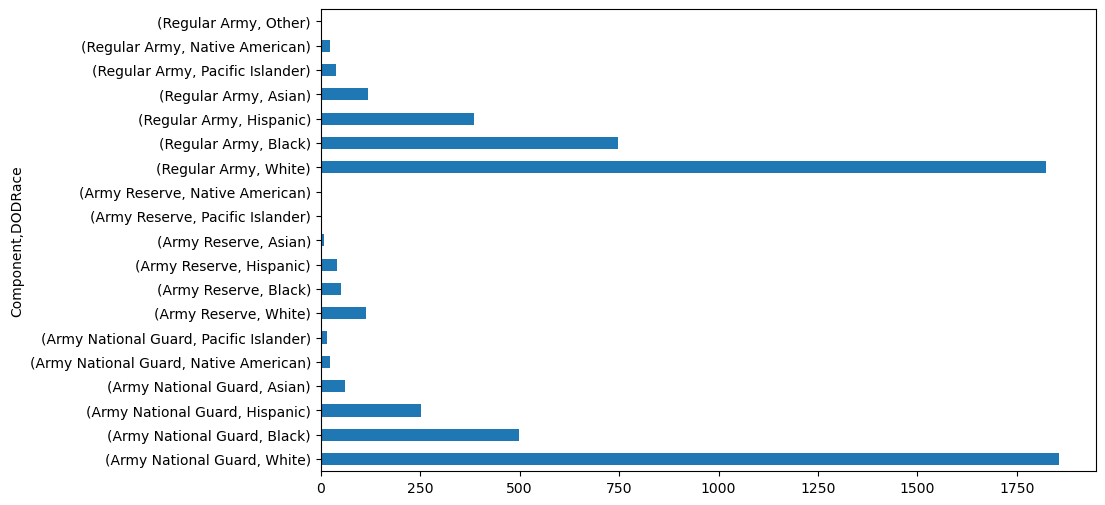

In [29]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")

In [30]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White              0.772
                                             Black              0.098
                                             Hispanic           0.092
                                             Asian              0.022
                                             Native American    0.011
                                             Pacific Islander   0.005
                     Combat Service Support  White              0.644
                                             Black              0.219
                                             Hispanic           0.100
                                             Asian              0.023
                                             Pacific Islander   0.008
                                             Native American    0.007
                     Combat Support          White              0.662
                            

In [31]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    index                           int64  
 1    subjectid                       float64
 2    abdominalextensiondepthsitting  int64  
 3    acromialheight                  int64  
 4    acromionradialelength           int64  
 5    anklecircumference              int64  
 6    axillaheight                    int64  
 7    balloffootcircumference         int64  
 8    balloffootlength                int64  
 9    biacromialbreadth               int64  
 10   bicepscircumferenceflexed       int64  
 11   bicristalbreadth                int64  
 12   bideltoidbreadth                int64  
 13   bimalleolarbreadth              int64  
 14   bitragionchinarc                int64  
 15   bitragionsubmandibulararc       int64  
 16   bizygomaticbreadth              int64  
 17   buttockcircu

In [32]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"
]

data.drop(drop_list1, axis=1, inplace=True)

In [33]:
# selected only White, Black, Hispanic

data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,0,10027.000,266,1467,337,222,1347,253,202,401,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,1,10032.000,233,1395,326,220,1293,245,193,394,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,2,10033.000,287,1430,341,230,1327,256,196,427,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,3,10092.000,234,1347,310,230,1239,262,199,401,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,4,10093.000,250,1585,372,247,1478,267,224,435,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
6064,1982,NaN,262,1324,301,202,1204,236,181,378,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
6065,1983,NaN,260,1334,318,213,1259,234,183,363,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
6066,1984,NaN,205,1293,302,199,1207,213,163,376,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [34]:
data.reset_index(drop=True, inplace=True)

In [35]:
data.head()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,0,10027.000,266,1467,337,222,1347,253,202,401,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,1,10032.000,233,1395,326,220,1293,245,193,394,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,2,10033.000,287,1430,341,230,1327,256,196,427,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,3,10092.000,234,1347,310,230,1239,262,199,401,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,4,10093.000,250,1585,372,247,1478,267,224,435,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand


In [36]:
data.tail()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
5764,1981,NaN,285,1392,335,223,1297,252,196,368,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
5765,1982,NaN,262,1324,301,202,1204,236,181,378,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
5766,1983,NaN,260,1334,318,213,1259,234,183,363,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
5767,1984,NaN,205,1293,302,199,1207,213,163,376,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand
5768,1985,NaN,238,1346,308,210,1256,236,188,361,...,394,943,610,154,797,Female,Texas,Hispanic,27,Right hand


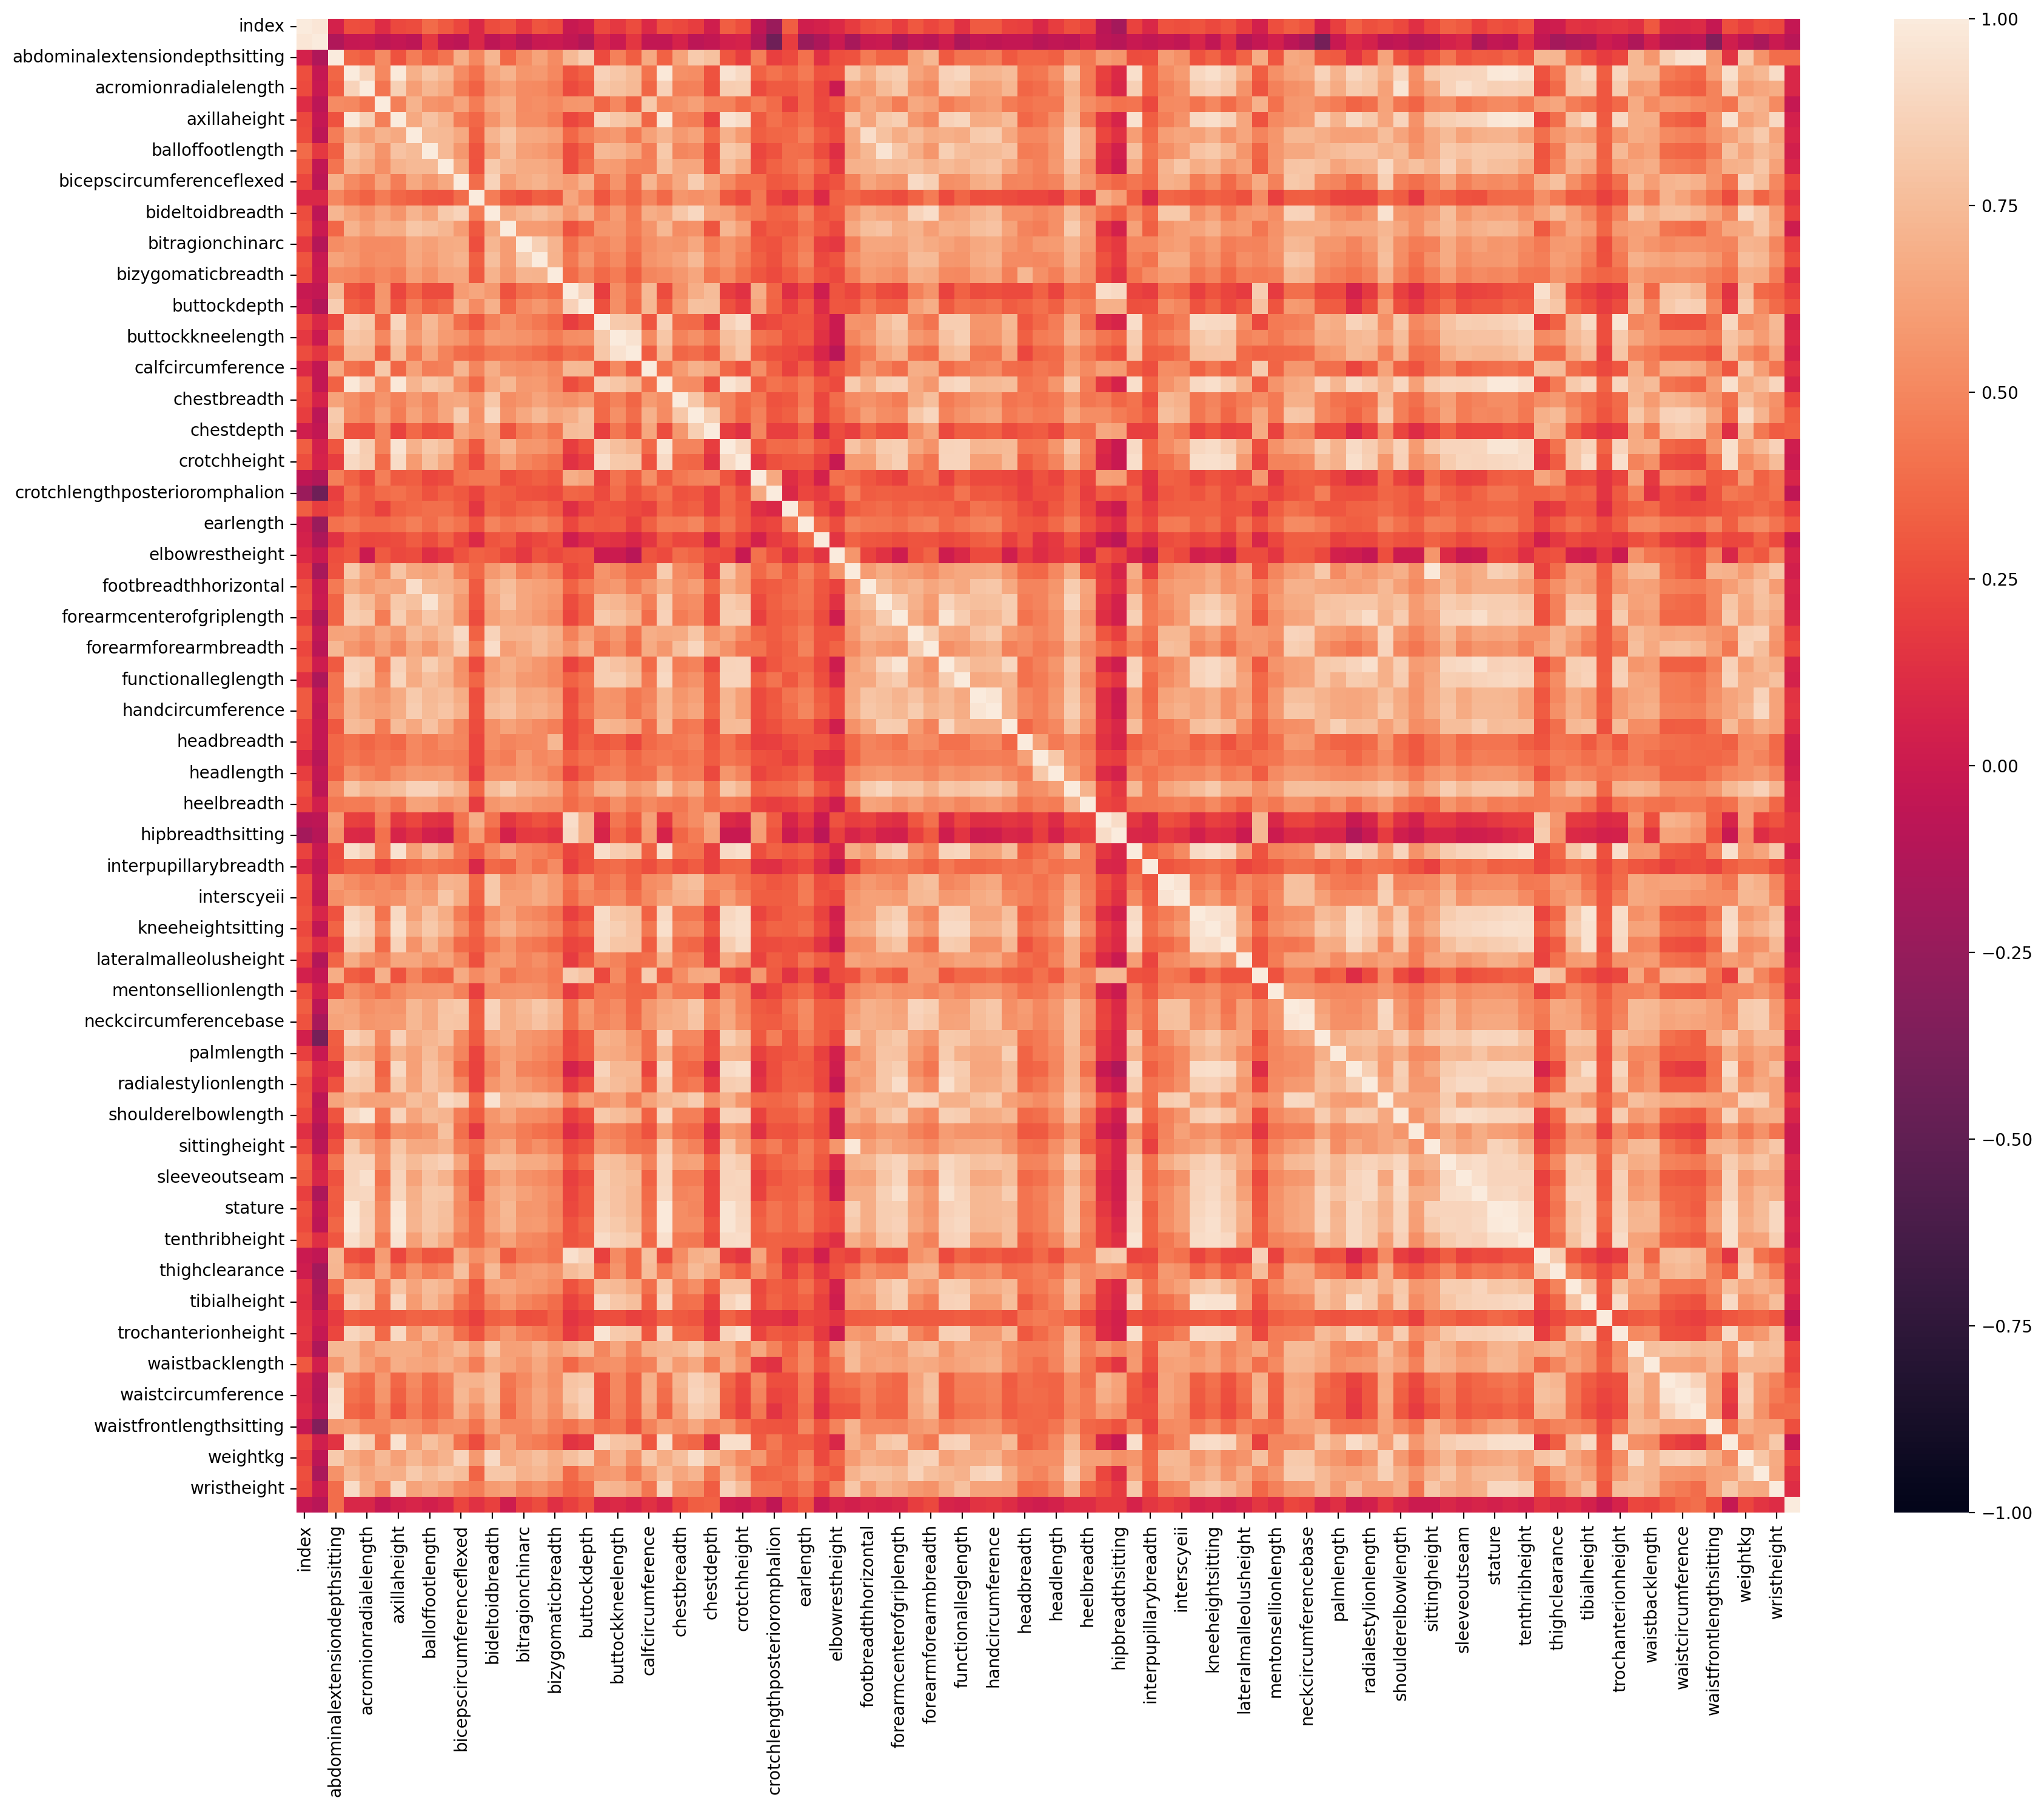

In [39]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1);

In [40]:
data.drop("subjectid", axis=1, inplace=True)

In [41]:
data.isnull().sum().any()

False

# DATA Preprocessing
- In this step, divided our data into X(Features) and y(Target) then,
- For training and evaluation purposes created training and test sets,
- Lastly, scaled our data if features are not on the same scale.

In [42]:
X = data.drop("DODRace", axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 233)
Train target shape   :  (4615,)
Test features shape  :  (1154, 233)
Test target shape    :  (1154,)


# Modelling
- Fitted the model with the training dataset
- Got predict from the vanilla model on both train and test sets to examine if there is over/underfitting   
- Applied GridseachCV for both hyperparameter tuning and sanity test of our model.
- Used hyperparameters that were found from grid-search and made a final prediction and evaluated the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, average_precision_score

In [51]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [52]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [53]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  11   7]
 [  6  99  25]
 [ 19 104 643]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       258
    Hispanic       0.46      0.76      0.58       130
       White       0.95      0.84      0.89       766

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 981   29   30]
 [  19  469   61]
 [  68  343 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.56      0.85      0.67       549
       White       0.97      0.86      0.91      3026

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [54]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [55]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.623
test_precision_Hispanic   0.516
test_recall_Hispanic      0.788
dtype: float64

### Logistic Model GridsearchCV

In [56]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [57]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [58]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,      # Hispanic turunun skorlarini artiracak en iyi parametreleri bul.
                              n_jobs=-1, cv=5)

In [59]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [60]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [61]:
log_model_grid.best_score_

0.7831526271893244

# if the best parameters obtained from the GridSearch process are the default values, it suggests that the default hyperparameters already provided optimal results for your model. Consequently, there is no need to perform cross-validation again after GridSearch.

In [62]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   4]
 [  6  97  27]
 [ 20 111 635]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       258
    Hispanic       0.44      0.75      0.55       130
       White       0.95      0.83      0.89       766

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.86      1154


Train_Set
[[ 971   33   36]
 [  24  462   63]
 [  72  349 2605]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1040
    Hispanic       0.55      0.84      0.66       549
       White       0.96      0.86      0.91      3026

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



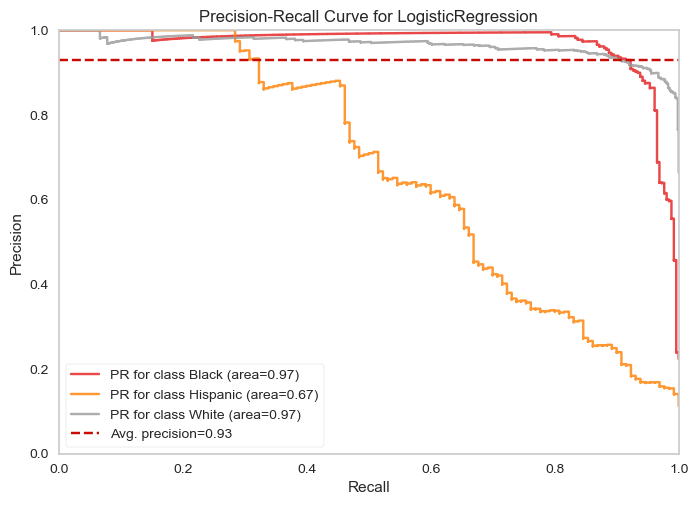

In [63]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [64]:
viz.score_

{'Black': 0.9688540985676586,
 'Hispanic': 0.6729180112433857,
 'White': 0.9650585810943046,
 'micro': 0.9305526410491125}

In [65]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### Lojistic Regression solver "liblenear" for small dataset

In [66]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [67]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[239   5  14]
 [  8  79  43]
 [ 16  35 715]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       258
    Hispanic       0.66      0.61      0.63       130
       White       0.93      0.93      0.93       766

    accuracy                           0.90      1154
   macro avg       0.83      0.82      0.83      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set
[[ 976   19   45]
 [  28  388  133]
 [  55  142 2829]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.71      0.71      0.71       549
       White       0.94      0.93      0.94      3026

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [68]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.664
test_precision_Hispanic   0.677
test_recall_Hispanic      0.654
dtype: float64

## 2. SVC

### Vanilla SVC model

In [69]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [70]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[242   8   8]
 [  7  91  32]
 [ 19 124 623]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       258
    Hispanic       0.41      0.70      0.52       130
       White       0.94      0.81      0.87       766

    accuracy                           0.83      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[ 957   37   46]
 [  23  464   62]
 [  58  383 2585]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1040
    Hispanic       0.52      0.85      0.65       549
       White       0.96      0.85      0.90      3026

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [71]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.589
test_precision_Hispanic   0.478
test_recall_Hispanic      0.768
dtype: float64

###  SVC Model GridsearchCV

In [72]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [73]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]

In [74]:
model = Pipeline(steps=operations_svc)

In [75]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [76]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [77]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [78]:
svm_model_grid.best_score_

0.7795162635529609

In [79]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242   8   8]
 [  7  91  32]
 [ 19 124 623]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       258
    Hispanic       0.41      0.70      0.52       130
       White       0.94      0.81      0.87       766

    accuracy                           0.83      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.83      0.84      1154


Train_Set
[[ 957   37   46]
 [  23  464   62]
 [  58  383 2585]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1040
    Hispanic       0.52      0.85      0.65       549
       White       0.96      0.85      0.90      3026

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [80]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

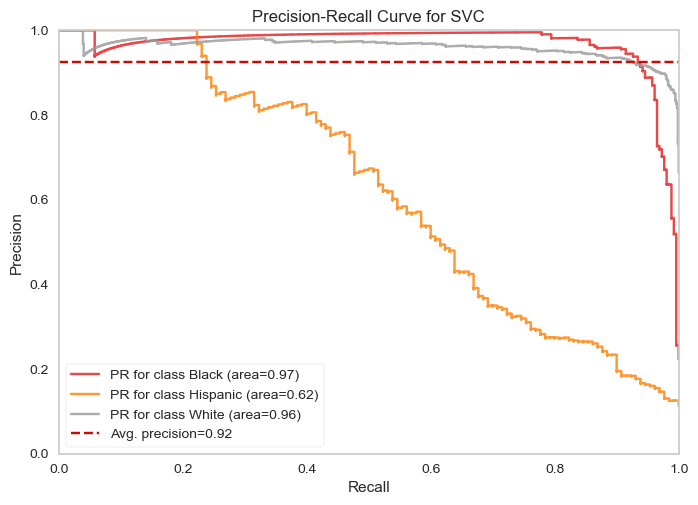

In [81]:
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [82]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
X2 = data.drop("DODRace",axis=1)
y = data.DODRace

In [85]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [86]:
enc = OrdinalEncoder()

In [87]:
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,...,240,440,1054,815,175,853,1.000,91.000,41,2.000
1,1,233,1395,326,220,1293,245,193,394,338,...,225,371,1054,726,167,815,1.000,86.000,35,1.000
2,2,287,1430,341,230,1327,256,196,427,408,...,255,411,1041,929,180,831,1.000,86.000,42,1.000
3,3,234,1347,310,230,1239,262,199,401,359,...,205,399,968,794,176,793,1.000,133.000,31,2.000
4,4,250,1585,372,247,1478,267,224,435,356,...,214,379,1245,946,188,954,1.000,90.000,21,2.000


In [88]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [89]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 98)
Train target shape   :  (4615,)
Test features shape  :  (1154, 98)
Test target shape    :  (1154,)


In [90]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [91]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [92]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[188   1  71]
 [ 10   8 118]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.90      0.72      0.80       260
    Hispanic       0.73      0.06      0.11       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.81      0.59      0.60      1154
weighted avg       0.81      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [93]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.090
test_precision_Hispanic   0.808
test_recall_Hispanic      0.048
dtype: float64

### RF Model GridsearchCV

In [94]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]}

In [95]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [96]:

rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [97]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [98]:
rf_grid_model.best_score_

0.22648657832144076

In [99]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[207   2  51]
 [ 13  29  94]
 [ 23  26 709]]
              precision    recall  f1-score   support

       Black       0.85      0.80      0.82       260
    Hispanic       0.51      0.21      0.30       136
       White       0.83      0.94      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.65      0.67      1154
weighted avg       0.80      0.82      0.80      1154


Train_Set
[[1023    1   14]
 [   0  529   14]
 [   3   19 3012]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.96      0.97      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.98      0.98      0.98      4615
weighted avg       0.99      0.99      0.99      4615



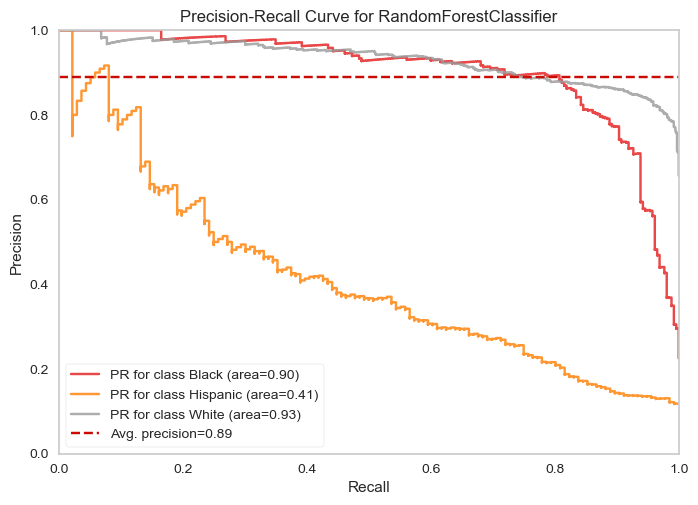

In [100]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [101]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [102]:
!pip install xgboost==0.90

In [103]:
import xgboost as xgb

xgb.__version__

'0.90'

In [104]:
from xgboost import XGBClassifier

In [105]:
xgb_model = XGBClassifier(random_state=101)

In [106]:
from sklearn.utils import class_weight

In [107]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [108]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [109]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[230  13  17]
 [ 10  87  39]
 [ 44  98 616]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.85       260
    Hispanic       0.44      0.64      0.52       136
       White       0.92      0.81      0.86       758

    accuracy                           0.81      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[ 974   27   37]
 [  16  474   53]
 [  82  338 2614]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1038
    Hispanic       0.56      0.87      0.69       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [110]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.521
test_precision_Hispanic   0.436
test_recall_Hispanic      0.648
dtype: float64

### XGBoost Model GridsearchCV

In [111]:
comp = pd.DataFrame(classes_weights)

In [112]:
comp["label"]= y_train2.reset_index(drop=True)

In [113]:
comp.groupby("label")[0].value_counts()

label     0    
White     0.507    3034
Black     1.482    1038
Hispanic  2.833     543
Name: count, dtype: int64

In [114]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [115]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model,
                              param_grid,
                              scoring=recall_Hispanic,
                              n_jobs = -1,
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [116]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [117]:
xgb_grid_model.best_score_

0.6371729527692831

In [118]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[229  14  17]
 [ 11  88  37]
 [ 41 102 615]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.85       260
    Hispanic       0.43      0.65      0.52       136
       White       0.92      0.81      0.86       758

    accuracy                           0.81      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[ 976   24   38]
 [  17  466   60]
 [  86  333 2615]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.86      0.68       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615



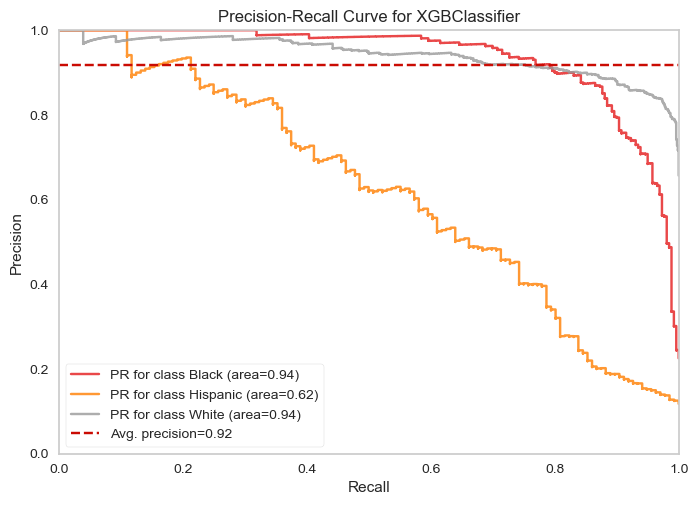

In [119]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [120]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

### Comparing Models

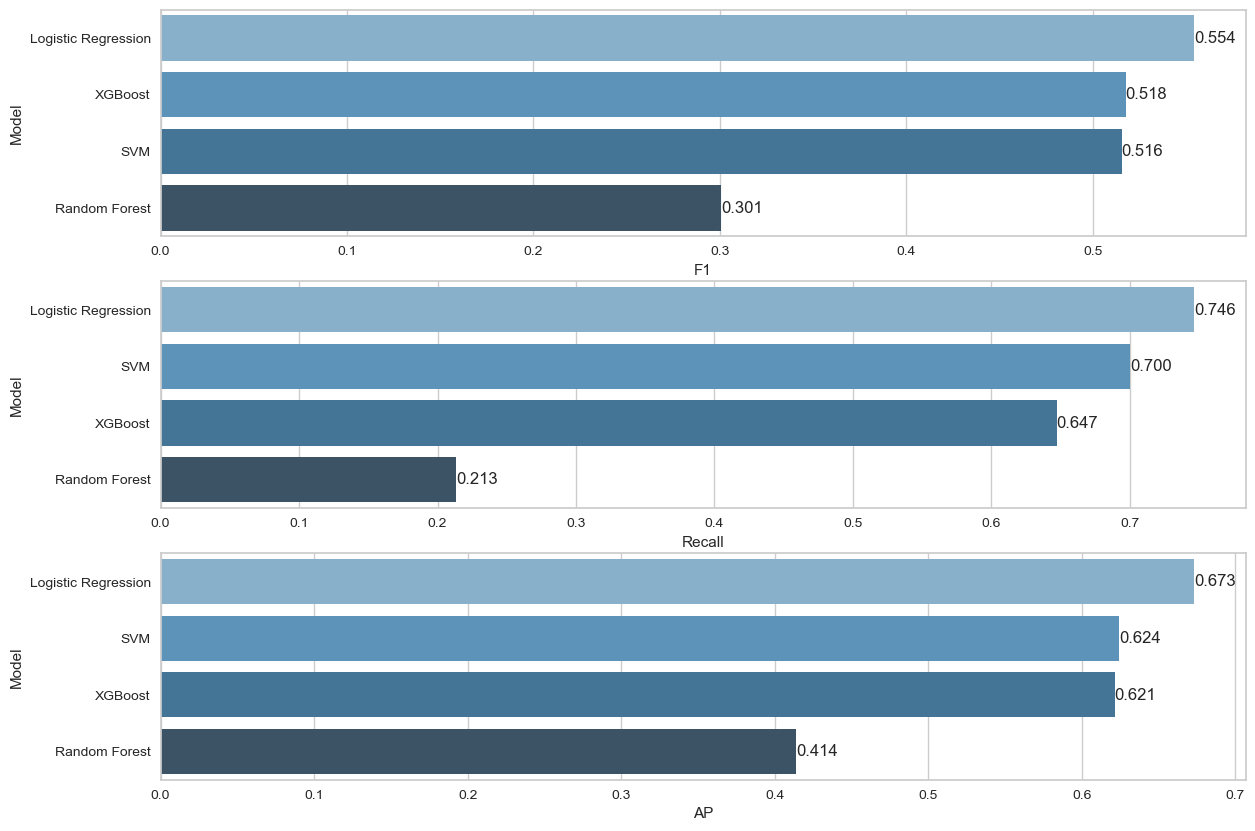

In [121]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

def labels(ax):   # Sayilari yazdirmak icin.
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
labels(ax)
plt.show()

# The best model is your logistics and we will continue on it

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [122]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [123]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [124]:
X.describe()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,...,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000
mean,1698.305,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,...,460.990,318.410,916.817,230.459,377.352,1033.591,800.981,169.308,831.335,29.776
std,1133.084,37.458,78.303,20.445,15.966,71.261,16.804,13.379,30.124,41.271,...,36.706,36.396,114.386,35.692,31.714,61.958,155.990,13.061,47.322,8.707
min,0.000,155.000,1146.000,249.000,156.000,1062.000,186.000,151.000,283.000,216.000,...,345.000,211.000,611.000,138.000,289.000,808.000,358.000,124.000,688.000,17.000
25%,764.000,220.000,1353.000,314.000,214.000,1252.000,233.000,186.000,377.000,312.000,...,435.000,292.000,831.000,204.000,355.000,990.000,686.000,159.000,798.000,23.000
50%,1512.000,243.000,1412.000,328.000,225.000,1304.000,245.000,196.000,404.000,342.000,...,463.000,316.000,910.000,226.000,376.000,1035.000,790.000,171.000,831.000,28.000
75%,2567.000,272.000,1464.000,342.000,235.000,1351.000,256.000,205.000,422.000,370.000,...,486.000,344.000,995.000,253.000,398.000,1077.000,900.000,179.000,864.000,36.000
max,4081.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,...,598.000,461.000,1379.000,406.000,494.000,1245.000,1442.000,216.000,1009.000,58.000


In [125]:
mean_human = X.describe().loc["mean"]
mean_human

index                            1698.305
abdominalextensiondepthsitting    247.254
acromialheight                   1408.630
acromionradialelength             328.072
anklecircumference                225.202
                                   ...   
waistheightomphalion             1033.591
weightkg                          800.981
wristcircumference                169.308
wristheight                       831.335
Age                                29.776
Name: mean, Length: 95, dtype: float64

In [138]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [139]:
y[201]

'Hispanic'

In [135]:
mean_human

index                            1698.305
abdominalextensiondepthsitting    247.254
acromialheight                   1408.630
acromionradialelength             328.072
anklecircumference                225.202
                                   ...   
waistheightomphalion             1033.591
weightkg                          800.981
wristcircumference                169.308
wristheight                       831.335
Age                                29.776
Name: mean, Length: 95, dtype: float64

In [140]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7565352191719873

In [141]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.745609170414654

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [142]:
!pip install imblearn

In [143]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [144]:
over = SMOTE()
under = RandomUnderSampler()

In [145]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [146]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [147]:
y_resampled_over.value_counts()

DODRace
White       3026
Hispanic    1200
Black       1040
Name: count, dtype: int64

In [148]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [149]:
y_resampled_under.value_counts()

DODRace
White       2500
Black       1040
Hispanic     549
Name: count, dtype: int64

In [150]:
steps = [('o', over), ('u', under)]

pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [151]:
y_resampled.value_counts()

DODRace
White       2500
Hispanic    1200
Black       1040
Name: count, dtype: int64

In [152]:
y_train.value_counts()

DODRace
White       3026
Black       1040
Hispanic     549
Name: count, dtype: int64

## Logistic Regression Over/Under Sampling

In [153]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()),
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [154]:
smote_pipeline = imbpipeline(steps=operations)

In [155]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1200})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [156]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[241   9   8]
 [  8  92  30]
 [ 20  84 662]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       258
    Hispanic       0.50      0.71      0.58       130
       White       0.95      0.86      0.90       766

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 977   31   32]
 [  28  428   93]
 [  62  276 2688]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1040
    Hispanic       0.58      0.78      0.67       549
       White       0.96      0.89      0.92      3026

    accuracy                           0.89      4615
   macro avg       0.82      0.87      0.84      4615
weighted avg       0.90      0.89      0.89      4615



In [157]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.618
test_precision_Hispanic   0.548
test_recall_Hispanic      0.710
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [188]:
!pip install shap

In [189]:
import shap
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained Logistic Regression model called 'model_shap'
# and scaled training data X_train_scaled, and testing data X_test_scaled

# Create a linear explainer for the logistic regression model
explainer = shap.LinearExplainer(model_shap, X_train_scaled)

# Compute SHAP values for the testing data
shap_values = explainer.shap_values(X_test_scaled)

# Print the SHAP values
print(shap_values)

[array([[-0.37001192, -0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [-0.0307041 , -0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.21641273, -0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       ...,
       [-0.42959878,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ],
       [ 0.25846082, -0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.16336918,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.        ]]), array([[ 0.        ,  0.10223578,  0.        , ...,  0.        ,
         0.20538381, -0.78037551],
       [ 0.        ,  0.16252379,  0.        , ...,  0.        ,
        -0.03068953,  0.12703787],
       [-0.        ,  0.11175494,  0.        , ...,  0.        ,
        -0.03068953,  0.12703787],
       ...,
       [ 0.        , -0.08814742,  0.        , ...,  0.        ,
        

In [190]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [192]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[238  12   8]
 [  7  95  28]
 [ 19 108 639]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       258
    Hispanic       0.44      0.73      0.55       130
       White       0.95      0.83      0.89       766

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[ 984   27   29]
 [  18  465   66]
 [  71  346 2609]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1040
    Hispanic       0.55      0.85      0.67       549
       White       0.96      0.86      0.91      3026

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [193]:
shap_values

[array([[-0.37001192, -0.        ,  0.        , ...,  0.        ,
          0.        , -0.        ],
        [-0.0307041 , -0.        ,  0.        , ...,  0.        ,
         -0.        ,  0.        ],
        [ 0.21641273, -0.        ,  0.        , ...,  0.        ,
         -0.        ,  0.        ],
        ...,
        [-0.42959878,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.        ],
        [ 0.25846082, -0.        , -0.        , ...,  0.        ,
         -0.        ,  0.        ],
        [-0.16336918,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.        ]]),
 array([[ 0.        ,  0.10223578,  0.        , ...,  0.        ,
          0.20538381, -0.78037551],
        [ 0.        ,  0.16252379,  0.        , ...,  0.        ,
         -0.03068953,  0.12703787],
        [-0.        ,  0.11175494,  0.        , ...,  0.        ,
         -0.03068953,  0.12703787],
        ...,
        [ 0.        , -0.08814742,  0.        , ...,  

In [194]:
print(shap_values[0].shape)

(1154, 233)


The model predicted: ['White' 'White' 'White' 'White' 'White' 'White' 'White' 'White' 'White'
 'White']


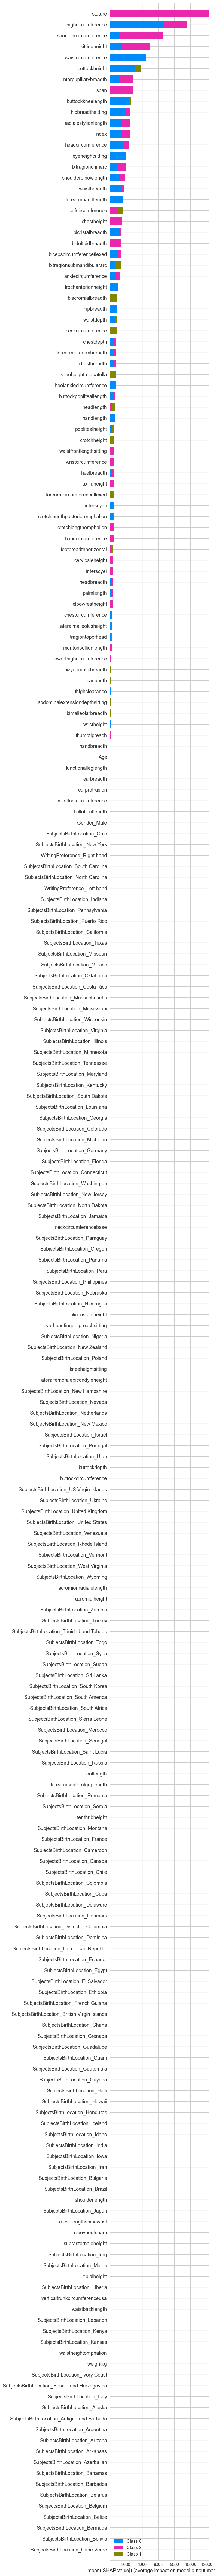

In [212]:
import shap

# Assuming you have a trained model called 'model' and 'explainer'
# and a test dataset called 'X_test'

# Define the start and end indices
start_index = 0
end_index = 10
# Make predictions on the test data
predictions = model.predict(X_test[start_index:end_index])

# Print the predictions
print(f"The model predicted: {predictions}")

# Compute SHAP values for the selected samples
shap_values = explainer.shap_values(X_test[start_index:end_index])

# Convert object-type features to categorical
categorical_features = X_test.select_dtypes(include='object').columns
X_test[categorical_features] = X_test[categorical_features].astype('category')

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X_test)

# Ensure feature_names is a list
feature_names = list(X_encoded.columns)

# Ensure shap_values is of compatible data type
shap_values = [sv.astype(float) for sv in shap_values]

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_encoded, max_display=300, feature_names=feature_names)